# Проект 2: Классификация спама

## 1. Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.svm import SVC

from wordcloud import WordCloud


## 2. Загрузка и анализ датасета

In [2]:
data= pd.read_csv('email.csv')
df= pd.DataFrame(data)
heafer= df.head()
print(heafer)

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
print(df['Category'].value_counts())

Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64


## 3. Очистка текста и предобработка

In [6]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Perform stemming
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'Message' column
df['Processed_Message'] = df['Message'].apply(preprocess_text)
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                   Processed_Message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  


In [7]:
def preprocess_text(text):
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize, drop words with len(word) <= 2, and remove stopwords
    words = text.split()
    words = [word for word in words if len(word) > 2 and word not in stop_words]
    # Perform stemming
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Update the column using the modified function
df['Processed_Message'] = df['Message'].apply(preprocess_text)
print(df.head())

  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                   Processed_Message  
0  jurong point crazi avail bugi great world buff...  
1                                   lar joke wif oni  
2  free entri wkli comp win cup final tkt may tex...  
3                      dun say earli hor alreadi say  
4               nah think goe usf live around though  


## 4. Векторизация (TF-IDF)

In [8]:
# Инициализация TF-IDF векторизатора
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Применение векторизации к обработанным сообщениям
X = tfidf_vectorizer.fit_transform(df['Processed_Message'])

# Вывод формы результирующей матрицы
print("TF-IDF матрица имеет форму:", X.shape)

TF-IDF матрица имеет форму: (5573, 5000)


In [9]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

## 5. Обучение модели (Logistic Regression / Random Forest)

In [10]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
y = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)  # Convert 'spam' to 1 and 'ham' to 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")

Accuracy of Logistic Regression model: 0.96


In [11]:

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       1.00      0.85      0.92       157

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [12]:
# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy of Naive Bayes model: {accuracy_nb:.2f}")

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Accuracy of Naive Bayes model: 0.97

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       958
           1       0.98      0.79      0.88       157

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [13]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM model: {accuracy_svm:.2f}")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy of SVM model: 0.98

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       0.97      0.88      0.92       157

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [14]:
params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), params, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)


Best params: {'C': 10}


## 6. Оценка метрик (precision, recall, f1)

In [15]:
# Precision, Recall, F1-score для логистической регрессии
precision_log_reg = precision_score(y_test, y_pred)
recall_log_reg = recall_score(y_test, y_pred)
f1_log_reg = f1_score(y_test, y_pred)

print("Logistic Regression Metrics:")
print(f"Precision: {precision_log_reg:.2f}")
print(f"Recall: {recall_log_reg:.2f}")
print(f"F1 Score: {f1_log_reg:.2f}")

# Precision, Recall, F1-score для Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")

Logistic Regression Metrics:
Precision: 0.98
Recall: 0.72
F1 Score: 0.83

Random Forest Metrics:
Precision: 1.00
Recall: 0.85
F1 Score: 0.92


## 7. Визуализация результатов

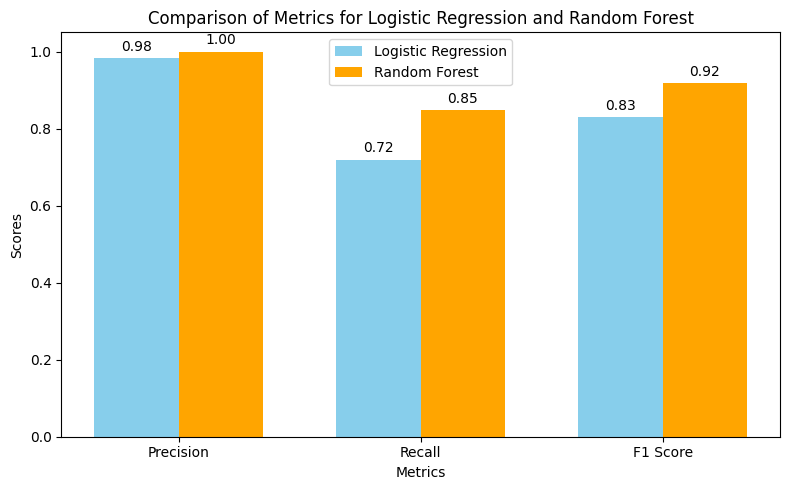

In [16]:
# Данные для визуализации
metrics = ['Precision', 'Recall', 'F1 Score']
log_reg_scores = [precision_log_reg, recall_log_reg, f1_log_reg]
rf_scores = [precision_rf, recall_rf, f1_rf]

# Построение графика
x = np.arange(len(metrics))  # Позиции метрик
width = 0.35  # Ширина столбцов

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, log_reg_scores, width, label='Logistic Regression', color='skyblue')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='orange')

# Добавление подписей и легенды
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics for Logistic Regression and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Отображение значений на столбцах
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

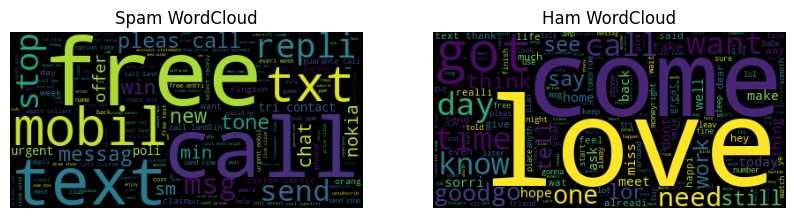

In [17]:
spam_words = ' '.join(df[df['Category'] == 'spam']['Processed_Message'])
ham_words = ' '.join(df[df['Category'] == 'ham']['Processed_Message'])

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(WordCloud().generate(spam_words))
plt.title('Spam WordCloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud().generate(ham_words))
plt.title('Ham WordCloud')
plt.axis('off')
plt.show()


## 8. Выводы

### 📌 Выводы:
- Лучшая модель — Random Forest (или та, что покажет лучшие метрики).
- Использование ROC-кривой позволило лучше оценить вероятность ошибок.

### 🚀 Идеи для развития:
- Подключить FastText или Word2Vec
- Развернуть в виде веб-приложения (например, через Streamlit)